In [5]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score,cross_val_predict
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score,cross_val_predict
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

In [6]:
data = pd.read_csv('Telecom_customer_churn.csv')

In [7]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
data.shape

(7043, 21)

In [9]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:

data.isnull().sum() 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:

data=data.replace(to_replace=" ",value=0)

In [12]:
data.TotalCharges=pd.to_numeric(data.TotalCharges)
data.MonthlyCharges=pd.to_numeric(data.MonthlyCharges)

In [13]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [14]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [15]:
#total charges is having huge difference between min and max and missing values are present in total charges

In [16]:
data.isnull().sum() 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

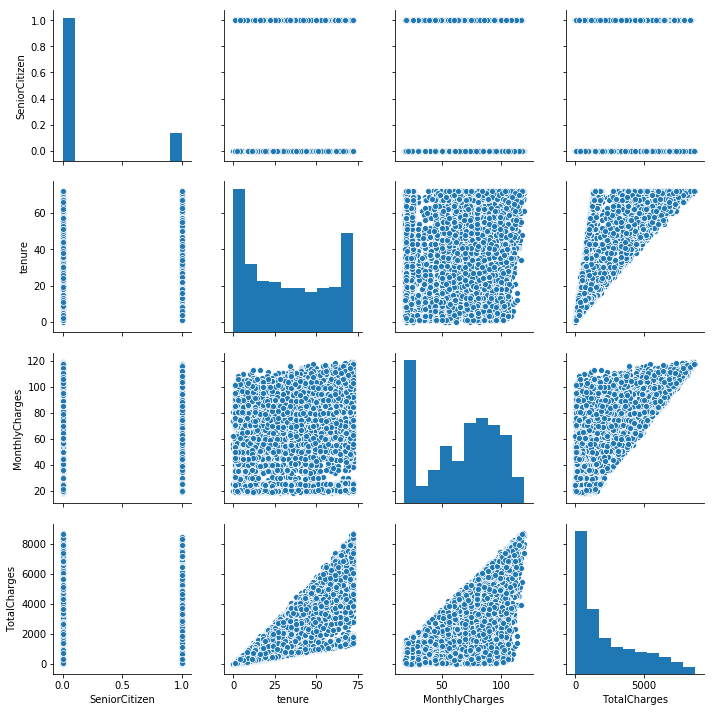

In [17]:
sns.pairplot(data)

In [18]:
x=data.iloc[:,1:20]

In [19]:
x.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [20]:
y=data.iloc[:,-1]

In [21]:
y

0        No
1        No
2       Yes
3        No
4       Yes
5       Yes
6        No
7        No
8       Yes
9        No
10       No
11       No
12       No
13      Yes
14       No
15       No
16       No
17       No
18      Yes
19       No
20      Yes
21       No
22      Yes
23       No
24       No
25       No
26      Yes
27      Yes
28       No
29      Yes
       ... 
7013     No
7014     No
7015     No
7016     No
7017     No
7018    Yes
7019     No
7020     No
7021    Yes
7022     No
7023     No
7024     No
7025     No
7026    Yes
7027     No
7028     No
7029     No
7030     No
7031     No
7032    Yes
7033     No
7034    Yes
7035     No
7036     No
7037     No
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
y

array([0, 0, 1, ..., 0, 1, 0])

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x['gender']=le.fit_transform(x['gender'])
x['gender']

0       0
1       1
2       1
3       1
4       0
5       0
6       1
7       0
8       0
9       1
10      1
11      1
12      1
13      1
14      1
15      0
16      0
17      1
18      0
19      0
20      1
21      1
22      1
23      0
24      1
25      0
26      1
27      1
28      1
29      0
       ..
7013    0
7014    1
7015    1
7016    0
7017    0
7018    1
7019    0
7020    1
7021    1
7022    1
7023    0
7024    1
7025    0
7026    0
7027    1
7028    0
7029    0
7030    0
7031    1
7032    1
7033    1
7034    0
7035    1
7036    0
7037    0
7038    1
7039    0
7040    0
7041    1
7042    1
Name: gender, Length: 7043, dtype: int32

In [24]:
x.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [25]:
x['TotalCharges'].fillna("0",inplace = True)

In [26]:
x.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [27]:
x.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,1,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,1,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,0,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


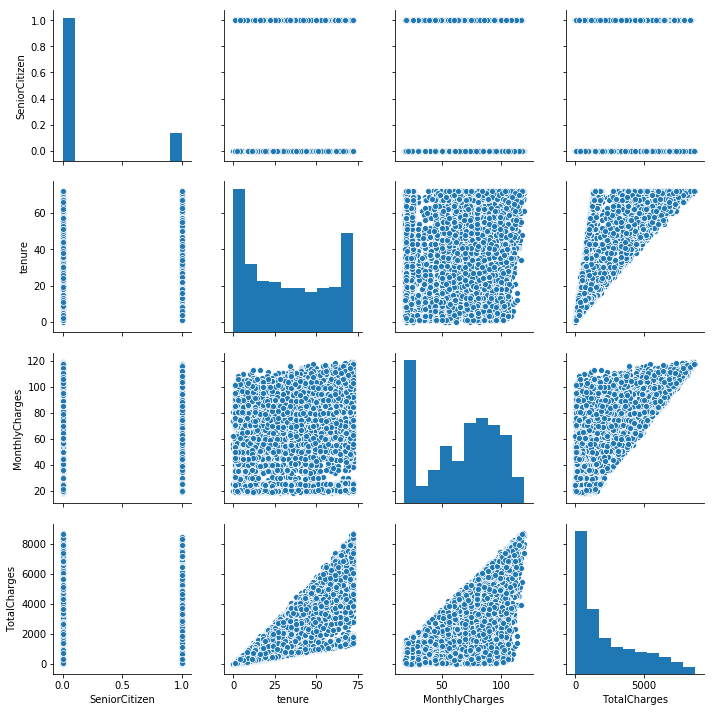

In [28]:
sns.pairplot(data)

In [29]:
x.dtypes

gender                int32
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [30]:
x.TotalCharges=pd.to_numeric(data.TotalCharges)

In [31]:
x['Partner']=le.fit_transform(x['Partner'])
x['Dependents']=le.fit_transform(x['Dependents'])
x['PhoneService']=le.fit_transform(x['PhoneService'])
x['MultipleLines']=le.fit_transform(x['MultipleLines'])
x['InternetService']=le.fit_transform(x['InternetService'])
x['OnlineSecurity']=le.fit_transform(x['OnlineSecurity'])
x['OnlineBackup']=le.fit_transform(x['OnlineBackup'])
x['DeviceProtection']=le.fit_transform(x['DeviceProtection'])
x['TechSupport']=le.fit_transform(x['TechSupport'])
x['StreamingTV']=le.fit_transform(x['StreamingTV'])
x['StreamingMovies']=le.fit_transform(x['StreamingMovies'])
x['Contract']=le.fit_transform(x['Contract'])
x['PaperlessBilling']=le.fit_transform(x['PaperlessBilling'])
x['PaymentMethod']=le.fit_transform(x['PaymentMethod'])



In [32]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1949.40
7,0,0,0,0,10,0,1,0,2,0,0,0,0,0,0,0,3,29.75,301.90
8,0,0,1,0,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,3046.05
9,1,0,0,1,62,1,0,0,2,2,0,0,0,0,1,0,0,56.15,3487.95


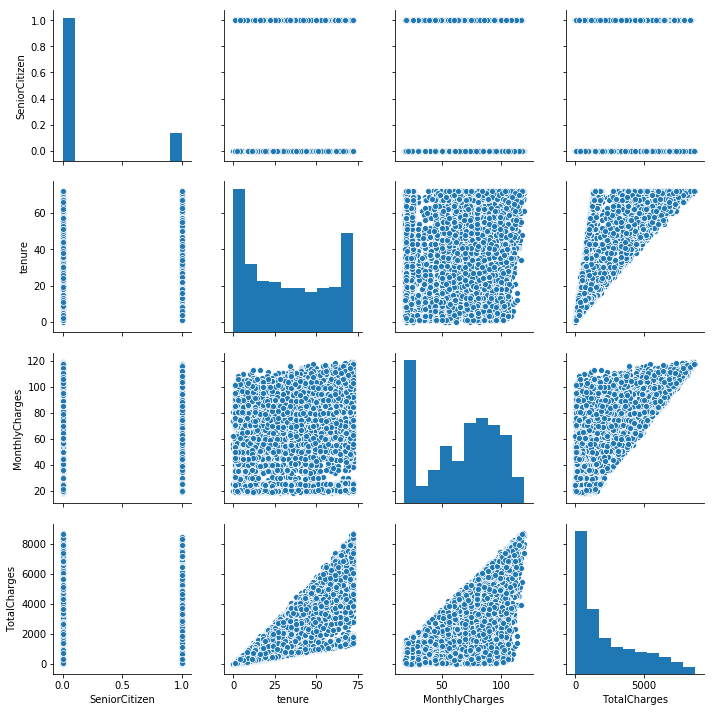

In [33]:
sns.pairplot(data)

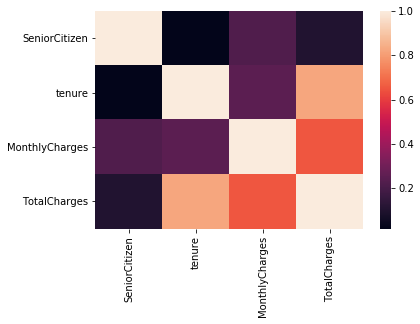

In [34]:
corr_heatmap=data.corr()
sns.heatmap(corr_heatmap)

In [35]:
from sklearn.preprocessing import StandardScaler
scale =StandardScaler()
x=scale.fit_transform(x)

In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score,cross_val_predict

In [37]:
lg=LogisticRegression()

In [38]:
print(cross_val_score(lg,x,y,cv=5).mean())

0.8019311331409466


In [39]:
#not getting gud score by using pca

In [40]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.22,random_state=45)
lg=LogisticRegression()
lg.fit(train_x,train_y)
pred=lg.predict(test_x)
print(pred)
print("accuracy_score:",accuracy_score(pred,test_y))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))


[0 0 0 ... 0 1 0]
accuracy_score: 0.8103225806451613
[[1036  116]
 [ 178  220]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1152
           1       0.65      0.55      0.60       398

   micro avg       0.81      0.81      0.81      1550
   macro avg       0.75      0.73      0.74      1550
weighted avg       0.80      0.81      0.80      1550



In [43]:
svc=SVC(kernel='linear')
print(cross_val_score(svc,x,y,cv=5).mean())

0.7955405977312061


In [44]:
svc=SVC(kernel='poly')
print(cross_val_score(svc,x,y,cv=5).mean())

0.7945510206243446


In [45]:
svc=SVC(kernel='rbf')
print(cross_val_score(svc,x,y,cv=5).mean())

0.8003703473910988


In [46]:
dtc=DecisionTreeClassifier()
print(cross_val_score(dtc,x,y,cv=5).mean())

0.7288151153388487


In [47]:
knc=KNeighborsClassifier(n_neighbors=5)
print(cross_val_score(knc,x,y,cv=5).mean())

0.7537993899507835


In [48]:
rf=RandomForestClassifier(n_estimators=100,random_state=40)
print(cross_val_score(rf,x,y,cv=5).mean())

0.791993999383595


In [49]:
gnb=GaussianNB()
print(cross_val_score(gnb,x,y,cv=5).mean())

0.7535142900523237


In [50]:
svc=SVC(kernel='linear')
svc.fit(train_x,train_y)
pred=svc.predict(test_x)
print(pred)
print("accuracy_score:",accuracy_score(pred,test_y))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))

[0 0 0 ... 0 1 0]
accuracy_score: 0.8006451612903226
[[1032  120]
 [ 189  209]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1152
           1       0.64      0.53      0.57       398

   micro avg       0.80      0.80      0.80      1550
   macro avg       0.74      0.71      0.72      1550
weighted avg       0.79      0.80      0.79      1550



In [51]:
svc=SVC(kernel='poly')
svc.fit(train_x,train_y)
pred=svc.predict(test_x)
print(pred)
print("accuracy_score:",accuracy_score(pred,test_y))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))

[0 0 0 ... 0 1 0]
accuracy_score: 0.8019354838709677
[[1052  100]
 [ 207  191]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1152
           1       0.66      0.48      0.55       398

   micro avg       0.80      0.80      0.80      1550
   macro avg       0.75      0.70      0.71      1550
weighted avg       0.79      0.80      0.79      1550



In [52]:
svc=SVC(kernel='rbf')
svc.fit(train_x,train_y)
pred=svc.predict(test_x)
print(pred)
print("accuracy_score:",accuracy_score(pred,test_y))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))

[0 0 0 ... 0 1 0]
accuracy_score: 0.8012903225806451
[[1058   94]
 [ 214  184]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1152
           1       0.66      0.46      0.54       398

   micro avg       0.80      0.80      0.80      1550
   macro avg       0.75      0.69      0.71      1550
weighted avg       0.79      0.80      0.79      1550



In [53]:

dtc=DecisionTreeClassifier()
dtc.fit(train_x,train_y)
pred=dtc.predict(test_x)
print(pred)
print("accuracy_score:",accuracy_score(pred,test_y))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))


[0 0 0 ... 0 0 0]
accuracy_score: 0.7283870967741936
[[931 221]
 [200 198]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1152
           1       0.47      0.50      0.48       398

   micro avg       0.73      0.73      0.73      1550
   macro avg       0.65      0.65      0.65      1550
weighted avg       0.73      0.73      0.73      1550



In [54]:
knc=KNeighborsClassifier(n_neighbors=5)
knc.fit(train_x,train_y)
pred=knc.predict(test_x)
print(pred)
print("accuracy_score:",accuracy_score(pred,test_y))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))

[0 0 0 ... 0 1 0]
accuracy_score: 0.7509677419354839
[[972 180]
 [206 192]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1152
           1       0.52      0.48      0.50       398

   micro avg       0.75      0.75      0.75      1550
   macro avg       0.67      0.66      0.67      1550
weighted avg       0.75      0.75      0.75      1550



In [55]:
rf=RandomForestClassifier(n_estimators=100,random_state=40)
rf.fit(train_x,train_y)
pred=rf.predict(test_x)
print(pred)
print("accuracy_score:",accuracy_score(pred,test_y))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))


[0 0 0 ... 0 1 1]
accuracy_score: 0.7961290322580645
[[1030  122]
 [ 194  204]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1152
           1       0.63      0.51      0.56       398

   micro avg       0.80      0.80      0.80      1550
   macro avg       0.73      0.70      0.72      1550
weighted avg       0.79      0.80      0.79      1550



In [56]:

gnb=GaussianNB()
gnb.fit(train_x,train_y)
pred=gnb.predict(test_x)
print(pred)
print("accuracy_score:",accuracy_score(pred,test_y))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))

[0 0 0 ... 0 1 1]
accuracy_score: 0.7612903225806451
[[872 280]
 [ 90 308]]
              precision    recall  f1-score   support

           0       0.91      0.76      0.82      1152
           1       0.52      0.77      0.62       398

   micro avg       0.76      0.76      0.76      1550
   macro avg       0.72      0.77      0.72      1550
weighted avg       0.81      0.76      0.77      1550



In [58]:
import pickle
saved_model=pickle.dumps(svc)
svc_from_pickle=pickle.loads(saved_model)

svc_from_pickle.predict(test_x)


array([0, 0, 0, ..., 0, 1, 0])